**Installing important packages**

In [99]:
pip install arm_pyart

  Using cached https://files.pythonhosted.org/packages/bd/84/d03b868a349d9e6ab63a6ac9e9e60b62b9fa00733d4ab9a5eafd83231a04/arm_pyart-1.11.4.tar.gz
  Created wheel for arm-pyart: filename=arm_pyart-1.11.4-cp37-cp37m-linux_x86_64.whl size=10210178 sha256=d921a91e2784a7ad0a83c46bfc4efd9f193345ed75ad4607886e7a0d61f92178
  Stored in directory: /root/.cache/pip/wheels/71/eb/98/eea5eab91b6d2a58991f17446ce9195c4d68c8ae11e438d890
Successfully built arm-pyart


In [100]:
pip install netcdf4

     |████████████████████████████████| 4.7MB 5.0MB/s 
     |████████████████████████████████| 317kB 14.0MB/s 


In [101]:
pip install git+https://github.com/SciTools/cartopy.git


  Cloning https://github.com/SciTools/cartopy.git to /tmp/pip-req-build-ate2z26y
  Running command git clone -q https://github.com/SciTools/cartopy.git /tmp/pip-req-build-ate2z26y
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 4.1MB/s 
  Created wheel for Cartopy: filename=Cartopy-0.19.0rc2.dev2+g4ca93c1-cp37-cp37m-linux_x86_64.whl size=12515159 sha256=9f2fd57086ad1df4ddb453f2d0fcd76ff765d1a6c047c0cea9f03b46e632f848
  Stored in directory: /tmp/pip-ephem-wheel-cache-gc3hdsip/wheels/ac/33/64/1a2fddaf0a5f699bb6848296a57ca902f5320baa86e8518b3b
Successfully built Cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=414aa99dd0e7814d22c54a2465e668007325419ba0ec931d69b3412b75d2ad20
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [104]:
pip uninstall shapely


Uninstalling Shapely-1.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.7.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.1


In [105]:
pip install shapely --no-binary shapely

     |████████████████████████████████| 389kB 5.5MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [106]:
pip install pyproj

     |████████████████████████████████| 6.5MB 5.5MB/s 


**Importing required libraries and packages**

In [107]:
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import os
from matplotlib import animation
import matplotlib.dates as md


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [108]:
import pyproj
import heapq

In [109]:
import requests
import urllib.parse

In [110]:
import gdown

**Downloading and unzipping the dataset**

In [ ]:
!gdown --id '1wihpGotUE2tct2J7MJoDBDUUVkZ_Jtsd'
!unzip -u "skill_test.zip"

In [112]:
!gdown --id '1BMGNudIVg0T499x-hDQYUJz1wG67hufw'

Downloading...
From: https://drive.google.com/uc?id=1BMGNudIVg0T499x-hDQYUJz1wG67hufw
To: /content/radar_lab_refl.csv
100% 3.21k/3.21k [00:00<00:00, 2.88MB/s]


In [115]:
names = os.listdir("./skill_test")
names = [name for name in names if name[:4] == 'KOKX' and name[-3:]!= "MDM"]
names.sort()


**Excercise 1: To create an animation of radar reflectivity data collected by the NEXRAD KOKX radar at the lowest elevation angle (i.e. 0.5°) on April 1, 2021.**

In [189]:
import warnings
warnings.filterwarnings("ignore")

def animated_gif(idx):

  plt.clf()
  radar = pyart.io.read_nexrad_archive(names[idx])
  display = pyart.graph.RadarMapDisplay(radar)

  projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                    central_longitude=radar.longitude['data'][0])

  display.plot_ppi_map('reflectivity', 1, vmin=-10, vmax=60,
                      width = 250000, height = 250000,
                      resolution='10m',
                      projection=projection,
                      fig=fig, 
                      lat_0=radar.latitude['data'][0],
                      lon_0=radar.longitude['data'][0]
                      )

  # Plot range rings at 40, 80, km
  display.plot_range_ring(40., line_style='k-')
  display.plot_range_ring(80., line_style='k-')
  display.plot_range_ring(120., line_style='k-')

  # Plot cross hairs
  display.plot_line_xy(np.array([-40000.0, 40000.0]), np.array([0.0, 0.0]), line_style='k-')
  display.plot_line_xy(np.array([0.0, 0.0]), np.array([-20000.0, 200000.0]), line_style='k-')

  # Indicate the radar location with a point
  display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0])

  #free the memory for radar
  del radar

fig = plt.figure(figsize=(10,10))

anim_klot = animation.FuncAnimation(fig, animated_gif,frames=len(names))

#Saving the animation with 5 frames per second
anim_klot.save('reflectivity_animation.gif', writer = "pillow", fps=5)
plt.close()

**Exercise 2: To locate the Stony Brook Radar Observatory (South P lot in Stony Brook), extract the time series of radar reflectivity at that location from the lowest elevation angle (i.e. 0.5°) observations collected on April 1, 2021 and plot it as a function of time.**

In [116]:
# Extraction of longtitude and latitude location of Stony Brook Radar Observatory.

address = 'South P Lot,Stony Brook, NY 11790'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
response = requests.get(url).json()
latitude = response[0]["lat"]    # latitude (in degrees) to find reflectivity at or near
longitude = response[0]["lon"]  # longitude (in degrees) to find reflectivity at or near

In [199]:

# Return the displacement from a radar location.
def find_x_y_displacement(radar, longitude, latitude):
    lat_0 = radar.latitude['data'][0]
    lon_0 = radar.longitude['data'][0]
    proj = pyproj.Proj(proj='aeqd', lon_0=lon_0, lat_0=lat_0)
    return proj(longitude, latitude)

# Return the non-zero, closest reflectivity value from "South P Lot,Stony Brook, NY 11790" location.
def find_reflectivity(radar, longitude, latitude, altitude):

    gate_x = radar.gate_x['data']
    gate_y = radar.gate_y['data']
    gate_z = radar.gate_z['data']

    x_disp, y_disp = find_x_y_displacement(radar, longitude, latitude)
    # Calculating distance from different gates
    distances = np.sqrt((gate_x-x_disp)**2. + (gate_y-y_disp)**2. + (gate_z-altitude)**2.)
    
    #To obtain the non-zero reflectivity data
    h = []
    for x in range(len(distances)):
      for y in range(len(distances[0])):
        heapq.heappush(h,(distances[x][y],(x,y)))   
    n = len(h)
    i = 0
    while i < n:
      _,idx = heapq.heappop(h)
      x = radar.fields['reflectivity']['data'][idx]
      if x:
        return x
      i+=1
    return None      

altitude = 100      # assumed altitude (in meters) to find reflectivity at or near
refl = []
time = []
hours = []
minutes = []

for filename in names:
  radar = pyart.io.read(filename)
  x = find_reflectivity(radar, longitude, latitude, altitude)
  time_utc = num2date(radar.time['data'][0],radar.time['units'])
  print(x, time_utc)
  refl.append(x)
  time.append(time_utc)
  hours.append(time_utc.hour)
  minutes.append(time_utc.minute)
  del radar



16.0 2021-04-01 00:09:14.673000
13.0 2021-04-01 00:18:57.269000
11.5 2021-04-01 00:28:39.881000
17.5 2021-04-01 00:38:21.876000
18.0 2021-04-01 00:48:04.320000
20.5 2021-04-01 00:57:47.928000
20.0 2021-04-01 01:07:30.841000
21.0 2021-04-01 01:17:13.476000
12.0 2021-04-01 01:26:55.875000
19.0 2021-04-01 01:36:38.619000
22.0 2021-04-01 01:40:38.024000
28.5 2021-04-01 01:47:27.328000
24.5 2021-04-01 01:54:23.872000
25.0 2021-04-01 02:01:19.743000
20.5 2021-04-01 02:08:15.676000
19.5 2021-04-01 02:15:11.445000
28.5 2021-04-01 02:22:01.093000
30.0 2021-04-01 02:28:50.028000
23.0 2021-04-01 02:35:38.715000
27.5 2021-04-01 02:44:30.235000
42.0 2021-04-01 02:51:19.047000
17.5 2021-04-01 02:58:08.028000
24.0 2021-04-01 03:04:56.599000
23.0 2021-04-01 03:11:45.526000
21.5 2021-04-01 03:18:33.090000
26.0 2021-04-01 03:25:20.825000
28.0 2021-04-01 03:32:09.761000
29.0 2021-04-01 03:38:58.431000
28.0 2021-04-01 03:45:47.405000
24.5 2021-04-01 03:52:36.052000
28.0 2021-04-01 03:59:31.778000
29.5 202

Saving the Radar Reflectivity data for Stony Brook Radar laboratory

In [ ]:
import pandas as pd
import datetime
#Saving the result in csv
df_refl = pd.DataFrame(np.array([refl,hours,minutes]).transpose(), columns = ["refl","hours", "minutes"])
df_refl.to_csv("radar_lab_refl.csv")

Read the pre-saved dataset for radar *lab*

In [117]:
df_refl = pd.read_csv("radar_lab_refl.csv")

In [118]:
time_new = (pd.to_datetime(df_refl['hours'].astype(int).astype(str) + ':' + df_refl['minutes'].astype(int).astype(str), format='%H:%M').dt.time)
time_new = pd.DataFrame(time_new)
time_new["refl"] = df_refl["refl"]
time_new = time_new.rename(columns={0:"time"})
time_new = time_new.set_index(["time"])
date = str(datetime.datetime.strptime('2021-04-01', '%Y-%m-%d').date())
time_new['timestamp'] = pd.to_datetime(date + " " + time_new.index.astype(str))
time_new = time_new.set_index(["timestamp"])

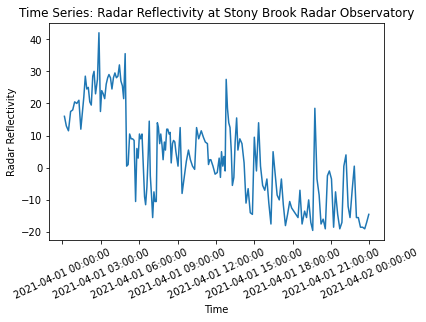

In [119]:
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(time_new.index, time_new.refl)
plt.xticks( rotation=25 )
plt.title("Time Series: Radar Reflectivity at Stony Brook Radar Observatory")
plt.xlabel("Time")
plt.ylabel("Radar Reflectivity")
plt.savefig("time_series.jpg")
plt.show()
